# Statistical Thinking in Python 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Empirical cumulative distribution function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)      # Number of data points
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

## 1. Parameter estimation (모수 추정)

### Exponential distribution (지수 분포)

* 일정 구간에서 일어날 확률이 균등할 경우 - 균등 분포
* 평균에 가까울수록 일어날 확률이 커질 경우 - 정규 분포
* 시간이 지날수록 확률이 점점 작아지는 경우 - [지수 분포](http://math7.tistory.com/51)

In [4]:
# 미 메이저리그에서 no-hitter 나타나는 주기 (단위:game) - 지수 분포
# tau : mean interval time

In [5]:
nohitter_times = np.array([843, 1613, 1101, 215, 684, 814, 278, 324, 161, 219, 545, 715, 966, 624, 29, 450, 107, 20, 91, 1325, 124, 1468, 104, 1309, 429, 62, 1878, 1104, 123, 251, 93, 188, 983, 166, 96, 702, 23, 524, 26, 299, 59, 39, 12, 2, 308, 1114, 813, 887, 645, 2088, 42, 2090, 11, 886, 1665, 1084, 2900, 2432, 750, 4021, 1070, 1765, 1322, 26, 548, 1525, 77, 2181, 2752, 127, 2147, 211, 41, 1575, 151, 479, 697, 557, 2267, 542, 392, 73, 603, 233, 255, 528, 397, 1529, 1023, 1194, 462, 583, 37, 943, 996, 480, 1497, 717, 224, 219, 1531, 498, 44, 288, 267, 600, 52, 269, 1086, 386, 176, 2199, 216, 54, 675, 1243, 463, 650, 171, 327, 110, 774, 509, 8, 197, 136, 12, 1124, 64, 380, 811, 232, 192, 731, 715, 226, 605, 539, 1491, 323, 240, 179, 702, 156, 82, 1397, 354, 778, 603, 1001, 385, 986, 203, 149, 576, 445, 180, 1403, 252, 675, 1351, 2983, 1568, 45, 899, 3260, 1025, 31, 100, 2055, 4043, 79, 238, 3931, 2351, 595, 110, 215, 0, 563, 206, 660, 242, 577, 179, 157, 192, 192, 1848, 792, 1693, 55, 388, 225, 1134, 1172, 1555, 31, 1582, 1044, 378, 1687, 2915, 280, 765, 2819, 511, 1521, 745, 2491, 580, 2072, 6450, 578, 745, 1075, 1103, 1549, 1520, 138, 1202, 296, 277, 351, 391, 950, 459, 62, 1056, 1128, 139, 420, 87, 71, 814, 603, 1349, 162, 1027, 783, 326, 101, 876, 381, 905, 156, 419, 239, 119, 129, 467])

In [6]:
tau = np.mean(nohitter_times)  # parameter

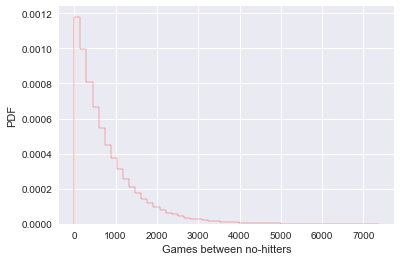

In [7]:
# tau를 통해 지수 분포 생성
inter_nohitter_time = np.random.exponential(tau, 100000)
# plot
_ = plt.hist(inter_nohitter_time, bins=50, normed=True, histtype='step', edgecolor='red')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

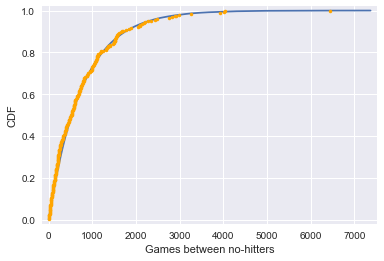

In [8]:
# ECDF from real data
x, y = ecdf(nohitter_times)

# CDF from theoretical samples
x_theor, y_theor = ecdf(inter_nohitter_time)

# plot - 실제 데이터와 이론상 데이터가 유사한 패턴을 보인다.
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none', color='orange')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

In [9]:
# tau 값이 1/2 또는 2배인 지수 분포와 함께 보면 tau 값이 optimal parameter 임을 알 수 있다.

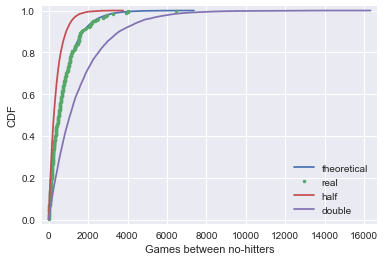

In [10]:
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

samples_half = np.random.exponential(tau/2, 10000)
samples_double = np.random.exponential(tau*2, 10000)

x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)
_ = plt.legend(('theoretical', 'real', 'half', 'double'), loc='lower right')
plt.show()

### Linear Regression

* correlation between female iliteracy and fertility (defined as the average number of children born per woman)
* 자녀 수가 많을 수록 문맹률이 높은가?

In [11]:
fertility = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173, 1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211, 2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281, 2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223, 4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505, 2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 , 5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541, 5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859, 4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505, 6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329, 5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 , 1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642, 2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836, 2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442, 1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502, 2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152, 2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822, 4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 , 1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663, 1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718, 1.732,  3.928])

In [12]:
illiteracy = np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6, 1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8, 8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4, 3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. , 33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2, 19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9, 34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9, 29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2, 78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9, 14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8, 16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6, 11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4, 0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. , 47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6, 19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3, 16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4, 3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5, 6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. , 0.9])

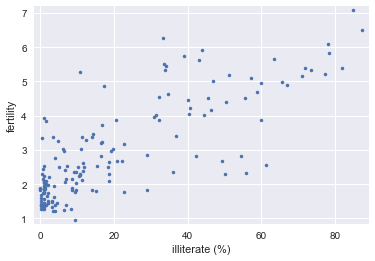

In [32]:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
_ = plt.xlabel('illiterate (%)')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

In [14]:
np.corrcoef(illiteracy, fertility)

array([[ 1.       ,  0.8041324],
       [ 0.8041324,  1.       ]])

In [15]:
# np.polyfit - 최소자승법을 이용한 선형회귀

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


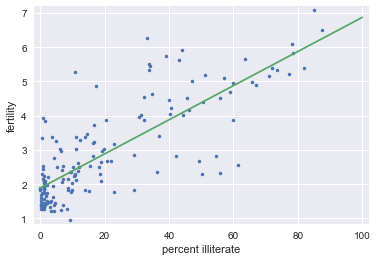

In [16]:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
plt.margins(0.02)

# Perform a linear regression using np.polyfit()
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot - regression line
x = np.array([0, 100])
y = a * x + b

_ = plt.plot(x, y)

## 2. Bootstrap confidence intervals

* Bootstrap : resampled data to perform statistical inference

In [17]:
df = pd.read_csv('data/election2012.csv')
df_ny = df.loc[df['state'] == 'NY']
vote_ny = df_ny['Obama']

In [18]:
# NY 주에서 오바마에 대한 지지율로 50개의 bootstrap 생성하여 ECDF 비교

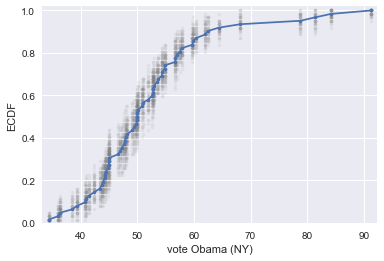

In [29]:
for _ in range(50):
    # Generate bootstrap sample
    bs_sample = np.random.choice(vote_ny, size=len(vote_ny))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)
    
# real data
x, y = ecdf(vote_ny)
_ = plt.plot(x, y, marker='.')

plt.margins(0.02)
_ = plt.xlabel('vote Obama (NY)')
_ = plt.ylabel('ECDF')
plt.show()

### Bootstrap confidence intervals

In [20]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [21]:
def draw_bootstrap_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

* 오바마에 대한 NY주의 지지율 평균을 10,000개의 bootstrap replicates로 추정

standard error of mean : 1.39909435215
standard deviation of bootstraps : 1.39503797657


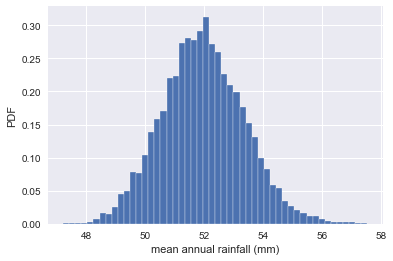

In [22]:
bs_replicates = draw_bootstrap_reps(vote_ny, np.mean, size=10000)

print('standard error of mean :', np.std(vote_ny) / np.sqrt(len(vote_ny)))
print('standard deviation of bootstraps :', np.std(bs_replicates))

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True, edgecolor='white')
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')
plt.show()

In [23]:
# 95% 신뢰구간
np.percentile(bs_replicates, [2.5, 97.5])

array([ 49.31129032,  54.77423387])

* no-hitter 에 대한 신뢰구간 추정

95% confidence interval = [ 662.71563745  870.74910359] games


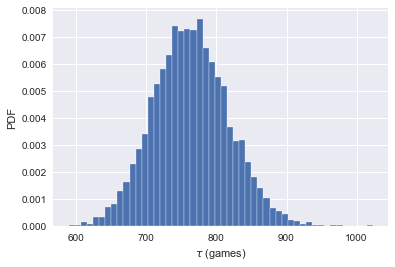

In [24]:
bs_replicates = draw_bootstrap_reps(nohitter_times, np.mean, size=10000)

conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'games')

_ = plt.hist(bs_replicates, bins=50, normed=True, edgecolor='white')
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

### Nonparametric inference (비모수 추정)

* 분포에 대해 알려지지 않아 데이터에 대한 추정
* [비모수 추정과 bootstrap](http://blog.naver.com/leerider/100189402336)

### Pairs bootstrap for linear regression
* Resample data in pairs
* Compute slope and intercept from resampled data
* Each slope and intercept is a bootstrap replicate
* Compute confidence intervals from percentiles of bootstrap replicates

In [25]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample
    inds = np.arange(len(x))

    # Initialize replicates
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [26]:
# 출산율 대비 문맹률 데이터에 대한 추정

95% confidence interval = [ 0.04426865  0.0556087 ]


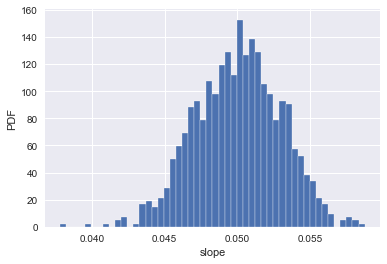

In [30]:
# estimate of the slope
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# 95% CI for slope
print('95% confidence interval =', np.percentile(bs_slope_reps, [2.5, 97.5]))

_ = plt.hist(bs_slope_reps, bins=50, normed=True, edgecolor='white')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

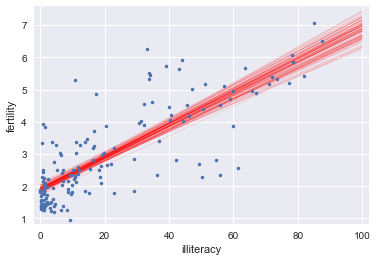

In [28]:
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## 3. Hypothesis testing

### permutation sampling (순열 샘플링)
* 두 변수가 동일한 확률을 갖는다는 가설을 증명
* 두 배열을 합쳐서 섞은 다음 각각 원래의 그 수만큼 분할

In [33]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [45]:
# 제품 A와 B의 1월 강수량 비교

In [46]:
rain_a = np.array([66.2,39.7,76.4,26.5,11.2,61.8,6.1,48.4,89.2,104.,34.,60.6,57.1,79.1,90.9,32.3,63.8,78.2,27.5,43.4,30.1,17.3,77.5,44.9,92.2,39.6,79.4,66.1,53.5,98.5,20.8,55.5,39.6,56.,65.1,14.8,13.2,88.1,8.4,32.1,19.6,40.4,2.2,77.5,105.4,77.2,38.,27.1,111.8,17.2,26.7,23.3,77.2,87.2,27.7,50.6,60.3,15.1,6.,29.4,39.3,56.3,80.4,85.3,68.4,72.5,13.3,28.4,14.7,37.4,49.5,57.2,85.9,82.1,31.8,126.6,30.7,41.4,33.9,13.5,99.1,70.2,91.8,61.3,13.7,54.9,62.5,24.2,69.4,83.1,44.,48.5,11.9,16.6,66.4,90.,43.2])
rain_b = np.array([83.6,30.9,62.2,37.,41.,160.2,18.2,122.4,71.3,44.2,49.1,37.6,114.5,28.8,82.5,71.9,50.7,67.7,112.,63.6,42.8,57.2,99.1,86.4,84.4,38.1,17.7,102.2,101.3,58.,82.,101.4,81.4,100.1,54.6,39.6,57.5,29.2,48.8,37.3,115.4,55.6,62.,95.,84.2,118.1,153.2,83.4,104.7,59.,46.4,50.,147.6,76.8,59.9,101.8,136.6,173.,92.5,37.,59.8,142.1,9.9,158.2,72.6,28.,112.9,119.3,199.2,50.7,44.,170.7,67.2,21.4,61.3,15.6,106.,116.2,42.3,38.5,132.5,40.8,147.5,93.9,71.4,87.3,163.7,141.4,62.6,84.9,28.8,121.1,28.6,32.4,112.,50.,126.8])

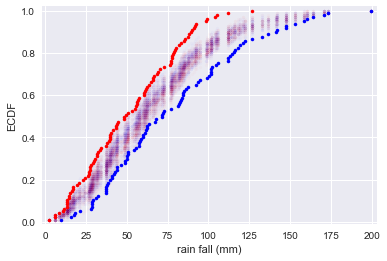

In [50]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_a, rain_b)

    # ECDFs of permutation sample
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)

# ECDFs from original data
x_1, y_1 = ecdf(rain_a)
x_2, y_2 = ecdf(rain_b)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('rain fall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

# 두 지역의 강수량은 동일한 분포를 갖지 않음을 알 수 있다.

## 5. Case study 